In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import datetime
import pytz
import plotly as pt
import plotly.graph_objects as go
from plotly.offline import iplot
from scipy import signal

In [3]:
wind = pd.read_csv('../../../Data/2023_03_27_norderney_weather_dwd/produkt_zehn_min_ff_20210923_20230326_03631.txt'
            , sep=';', parse_dates=[1])

perci = pd.read_csv('../../../Data/2023_03_27_norderney_weather_dwd/produkt_zehn_min_rr_20210923_20230326_03631.txt'
            , sep=';', parse_dates=[1])


solar = pd.read_csv('../../../Data/2023_03_27_norderney_weather_dwd/produkt_zehn_min_sd_20210923_20230326_03631.txt'
            , sep=';', parse_dates=[1])

temp = pd.read_csv('../../../Data/2023_03_27_norderney_weather_dwd/produkt_zehn_min_tu_20210923_20230326_03631.txt'
            , sep=';', parse_dates=[1])
temp

STATIONS_ID          MESS_DATUM    QN   PP_10  TT_10  TM5_10  RF_10  \
0             3631 2021-09-23 00:00:00     3  1017.6   15.7    14.6   86.5   
1             3631 2021-09-23 00:10:00     3  1017.4   15.6    14.7   85.4   
2             3631 2021-09-23 00:20:00     3  1017.1   15.5    14.4   85.9   
3             3631 2021-09-23 00:30:00     3  1016.9   15.6    14.6   85.7   
4             3631 2021-09-23 00:40:00     3  1016.8   15.6    14.6   85.9   
...            ...                 ...   ...     ...    ...     ...    ...   
79195         3631 2023-03-26 23:10:00     2  1009.7    5.6     4.4   62.9   
79196         3631 2023-03-26 23:20:00     2  1009.8    5.5     4.5   64.4   
79197         3631 2023-03-26 23:30:00     2  1009.9    5.5     4.4   63.5   
79198         3631 2023-03-26 23:40:00     2  1010.1    4.8     3.6   75.8   
79199         3631 2023-03-26 23:50:00     2  1010.3    4.8     3.6   76.1   

       TD_10  eor  
0       13.5  eor  
1       13.2  eor  
2       13.2  eor  
3       13.2  eor  
4       13.3  eor  
...      ...  ...  
79195   -0.9  eor  
79196   -0.7  eor  
79197   -0.9  eor  
79198    0.9  eor  
79199    1.0  eor  

[79200 rows x 9 columns]

In [4]:
soil_hist = pd.read_csv('../../../Data/2023_03_27_norderney_weather_dwd/derived_germany__soil__daily__historical__3631.txt'
            , sep=';', parse_dates=[1])
#soil_hist

soil_rcnt1 = pd.read_csv('../../../Data/2023_03_27_norderney_weather_dwd/derived_germany__soil__daily__recent__3631.txt'
            , sep=';', parse_dates=[1])


custom_date_parser = lambda x: datetime.datetime.strptime(x, "%Y%m%d%H")


soil = pd.read_csv('../../../Data/2023_03_27_norderney_weather_dwd/bodentemp/produkt_eb_stunde_20211023_20230425_03631.txt'
            , sep=';', parse_dates=[1], date_parser=custom_date_parser)

soil['MESS_DATUM'] = pd.to_datetime(soil['MESS_DATUM'], utc = pytz.timezone("Europe/Berlin"))
soil

STATIONS_ID                MESS_DATUM  QN_2  V_TE002  V_TE005  V_TE010  \
0             3631 2021-10-23 00:00:00+00:00     3     -999      7.7      8.2   
1             3631 2021-10-23 01:00:00+00:00     3     -999      7.6      8.1   
2             3631 2021-10-23 02:00:00+00:00     3     -999      7.8      8.2   
3             3631 2021-10-23 03:00:00+00:00     3     -999      7.8      8.2   
4             3631 2021-10-23 04:00:00+00:00     3     -999      7.7      8.1   
...            ...                       ...   ...      ...      ...      ...   
13195         3631 2023-04-25 19:00:00+00:00     1     -999      8.0      9.2   
13196         3631 2023-04-25 20:00:00+00:00     1     -999      7.0      8.3   
13197         3631 2023-04-25 21:00:00+00:00     1     -999      6.5      7.7   
13198         3631 2023-04-25 22:00:00+00:00     1     -999      6.2      7.3   
13199         3631 2023-04-25 23:00:00+00:00     1     -999      6.0      7.0   

       V_TE020  V_TE050  V_TE100  eor  
0          9.1     11.3     13.3  eor  
1          9.1     11.2     13.3  eor  
2          9.0     11.2     13.3  eor  
3          9.0     11.2     13.3  eor  
4          9.0     11.1     13.3  eor  
...        ...      ...      ...  ...  
13195     10.4     10.3     10.4  eor  
13196      9.9     10.3     10.4  eor  
13197      9.4     10.3     10.4  eor  
13198      9.0     10.3     10.3  eor  
13199      8.6     10.3     10.3  eor  

[13200 rows x 10 columns]

In [5]:
data_merged = pd.merge(pd.merge(pd.merge(temp, perci), wind), solar)
data_merged['MESS_DATUM'] = pd.to_datetime(data_merged['MESS_DATUM'], utc = pytz.timezone("Europe/Berlin"))
data_merged

STATIONS_ID                MESS_DATUM    QN   PP_10  TT_10  TM5_10  \
0             3631 2021-09-23 00:00:00+00:00     3  1017.6   15.7    14.6   
1             3631 2021-09-23 00:10:00+00:00     3  1017.4   15.6    14.7   
2             3631 2021-09-23 00:20:00+00:00     3  1017.1   15.5    14.4   
3             3631 2021-09-23 00:30:00+00:00     3  1016.9   15.6    14.6   
4             3631 2021-09-23 00:40:00+00:00     3  1016.8   15.6    14.6   
...            ...                       ...   ...     ...    ...     ...   
79195         3631 2023-03-26 23:10:00+00:00     2  1009.7    5.6     4.4   
79196         3631 2023-03-26 23:20:00+00:00     2  1009.8    5.5     4.5   
79197         3631 2023-03-26 23:30:00+00:00     2  1009.9    5.5     4.4   
79198         3631 2023-03-26 23:40:00+00:00     2  1010.1    4.8     3.6   
79199         3631 2023-03-26 23:50:00+00:00     2  1010.3    4.8     3.6   

       RF_10  TD_10  eor  RWS_DAU_10  RWS_10  RWS_IND_10  FF_10  DD_10  DS_10  \
0       86.5   13.5  eor           0     0.0           0    7.0    220    0.0   
1       85.4   13.2  eor           0     0.0           0    7.4    220    0.0   
2       85.9   13.2  eor           0     0.0           0    7.2    220    0.0   
3       85.7   13.2  eor           0     0.0           0    7.3    220    0.0   
4       85.9   13.3  eor           0     0.0           0    7.3    220    0.0   
...      ...    ...  ...         ...     ...         ...    ...    ...    ...   
79195   62.9   -0.9  eor           0     0.0           0   10.7    340 -999.0   
79196   64.4   -0.7  eor           0     0.0           0   11.9    330 -999.0   
79197   63.5   -0.9  eor           0     0.0           0   12.7    330 -999.0   
79198   75.8    0.9  eor           0     0.0           0   11.4    350 -999.0   
79199   76.1    1.0  eor           0     0.0           0   10.1    340 -999.0   

       GS_10  SD_10  LS_10  
0        0.0    0.0   -999  
1        0.0    0.0   -999  
2        0.0    0.0   -999  
3        0.0    0.0   -999  
4        0.0    0.0   -999  
...      ...    ...    ...  
79195    0.0    0.0   -999  
79196    0.0    0.0   -999  
79197    0.0    0.0   -999  
79198    0.0    0.0   -999  
79199    0.0    0.0   -999  

[79200 rows x 18 columns]

In [6]:
data_merged[data_merged['MESS_DATUM'] >
            datetime.datetime(2022,10,30,0, tzinfo=pytz.timezone("Europe/Berlin"))][::20].head(40)

STATIONS_ID                MESS_DATUM    QN   PP_10  TT_10  TM5_10  \
57883         3631 2022-10-29 23:10:00+00:00     3  1013.5   14.7    13.5   
57903         3631 2022-10-30 02:30:00+00:00     3  1013.1   14.5    13.5   
57923         3631 2022-10-30 05:50:00+00:00     3  1013.5   14.1    13.2   
57943         3631 2022-10-30 09:10:00+00:00     3  1014.9   14.1    15.3   
57963         3631 2022-10-30 12:30:00+00:00     3  1014.6   17.9    20.4   
57983         3631 2022-10-30 15:50:00+00:00     3  1014.0   16.8    15.8   
58003         3631 2022-10-30 19:10:00+00:00     3  1015.3   15.7    14.7   
58023         3631 2022-10-30 22:30:00+00:00     3  1016.6   14.4    13.6   
58043         3631 2022-10-31 01:50:00+00:00     3  1017.6   13.2    12.2   
58063         3631 2022-10-31 05:10:00+00:00     3  1018.0   11.9    11.0   
58083         3631 2022-10-31 08:30:00+00:00     3  1018.4   12.6    12.3   
58103         3631 2022-10-31 11:50:00+00:00     3  1017.9   14.6    16.9   
58123         3631 2022-10-31 15:10:00+00:00     3  1015.1   14.4    14.1   
58143         3631 2022-10-31 18:30:00+00:00     3  1013.1   12.9    12.5   
58163         3631 2022-10-31 21:50:00+00:00     3  1009.5   13.1    12.1   
58183         3631 2022-11-01 01:10:00+00:00     3  1007.2   13.7    12.8   
58203         3631 2022-11-01 04:30:00+00:00     3  1005.1   14.6    14.3   
58223         3631 2022-11-01 07:50:00+00:00     3  1006.4   14.3    13.6   
58243         3631 2022-11-01 11:10:00+00:00     3  1008.5   15.1    16.9   
58263         3631 2022-11-01 14:30:00+00:00     3  1009.8   15.1    15.5   
58283         3631 2022-11-01 17:50:00+00:00     3  1010.4   13.8    12.9   
58303         3631 2022-11-01 21:10:00+00:00     3  1010.8   13.5    13.1   
58323         3631 2022-11-02 00:30:00+00:00     3  1009.1   12.9    12.5   
58343         3631 2022-11-02 03:50:00+00:00     3  1008.2   11.8    10.8   
58363         3631 2022-11-02 07:10:00+00:00     3  1009.5   11.5    10.6   
58383         3631 2022-11-02 10:30:00+00:00     3  1013.0   13.2    13.9   
58403         3631 2022-11-02 13:50:00+00:00     3  1015.1   13.3    14.4   
58423         3631 2022-11-02 17:10:00+00:00     3  1015.0   12.0    10.9   
58443         3631 2022-11-02 20:30:00+00:00     3  1013.2   11.4    10.6   
58463         3631 2022-11-02 23:50:00+00:00     3  1010.9   11.0    10.4   
58483         3631 2022-11-03 03:10:00+00:00     3  1008.5   10.9    10.1   
58503         3631 2022-11-03 06:30:00+00:00     3  1007.0   10.3     9.6   
58523         3631 2022-11-03 09:50:00+00:00     3  1005.3   12.9    13.9   
58543         3631 2022-11-03 13:10:00+00:00     3  1001.9   14.1    14.0   
58563         3631 2022-11-03 16:30:00+00:00     3   998.8   13.1    12.7   
58583         3631 2022-11-03 19:50:00+00:00     3   996.9   11.1    10.5   
58603         3631 2022-11-03 23:10:00+00:00     3   995.3   11.1    10.7   
58623         3631 2022-11-04 02:30:00+00:00     3   993.8   11.0     9.9   
58643         3631 2022-11-04 05:50:00+00:00     3   998.1   11.7    10.3   
58663         3631 2022-11-04 09:10:00+00:00     3  1001.1   11.6    10.7   

       RF_10  TD_10  eor  RWS_DAU_10  RWS_10  RWS_IND_10  FF_10  DD_10  DS_10  \
57883   93.1   13.6  eor           0    0.00           0    3.8    160    0.0   
57903   88.9   12.7  eor           0    0.00           0    4.5    190    0.0   
57923   91.5   12.7  eor           0    0.00           0    4.6    200    0.0   
57943   89.0   12.3  eor           0    0.00           0    4.1    200    4.3   
57963   78.7   14.2  eor           0    0.00           0    2.1    200    5.7   
57983   87.8   14.8  eor           0    0.00           0    2.3    150    0.9   
58003   91.5   14.3  eor           0    0.00           0    3.0    200    0.0   
58023   96.1   13.8  eor           0    0.00           0    4.0    240    0.0   
58043   95.2   12.5  eor           0    0.00           0    4.5    210    0.0   
58063   96.0   11.3  eor           0   

C:\Users\Memo\AppData\Local\Temp\ipykernel_5504\293632612.py:4: DeprecationWarning:

parsing timezone aware datetimes is deprecated; this will raise an error in the future

C:\Users\Memo\AppData\Local\Temp\ipykernel_5504\293632612.py:5: DeprecationWarning:

parsing timezone aware datetimes is deprecated; this will raise an error in the future



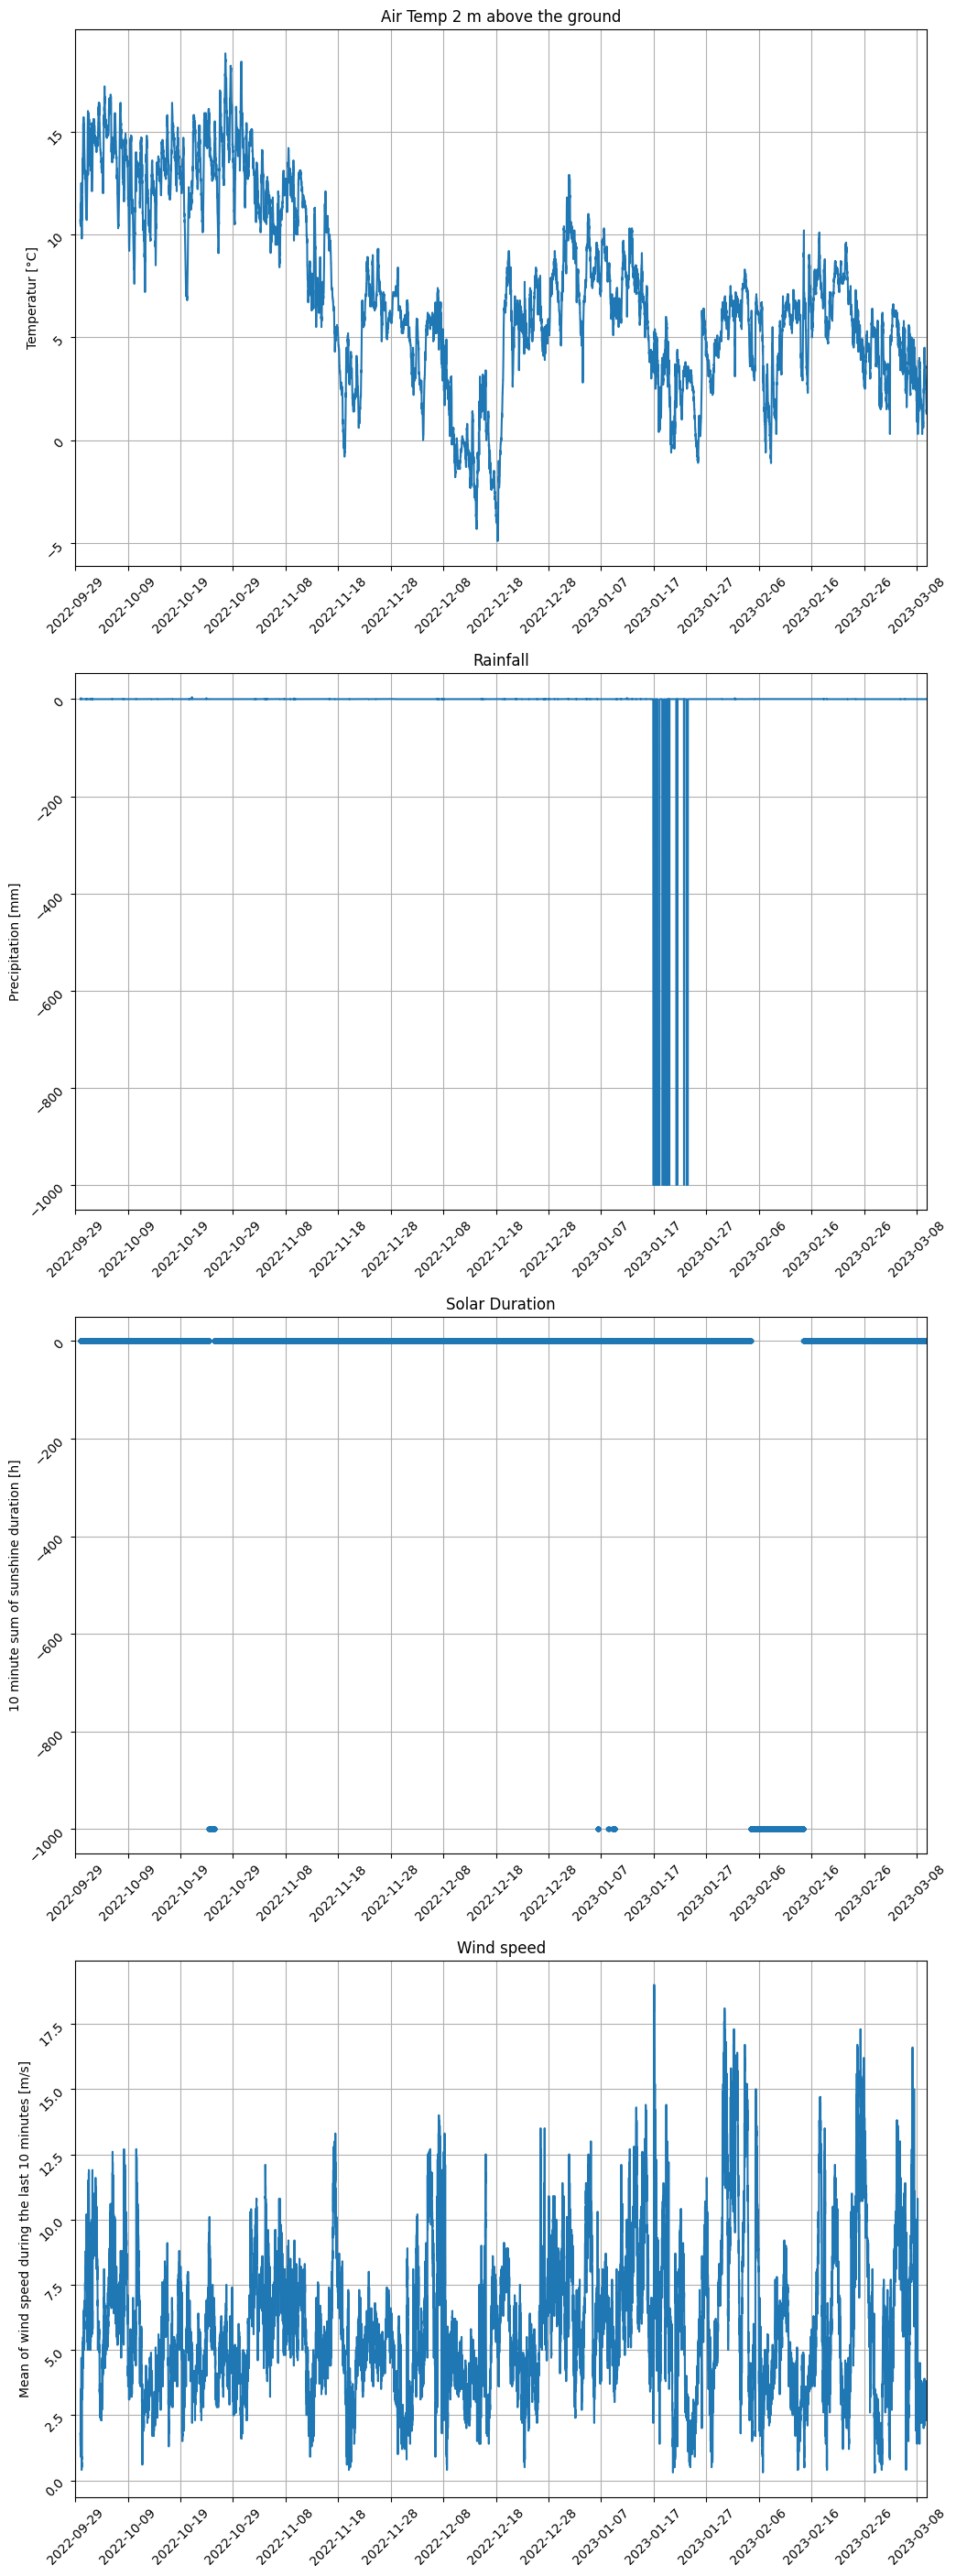

In [7]:
start_date = datetime.datetime(2022,9,30, tzinfo = pytz.timezone("Europe/Berlin")) 
end_date   = datetime.datetime(2023,3,10, tzinfo = pytz.timezone("Europe/Berlin"))

days = np.arange(np.datetime64(np.datetime_as_string(np.datetime64(start_date))[:10]),
         np.datetime64(np.datetime_as_string(np.datetime64(end_date))[:10]), 10)

data_merged_dated = data_merged[(data_merged['MESS_DATUM'] >= start_date) & (data_merged['MESS_DATUM'] <= end_date)]

fig, axes = plt.subplots(4, figsize=(12,35))

ax = axes[0]
ax.plot(data_merged_dated['MESS_DATUM'], data_merged_dated['TT_10'])

ax.grid()
ax.set_title('Air Temp 2 m above the ground')
ax.set_ylabel("Temperatur [°C]")
ax.set_xlim(start_date, end_date)
ax.set_xticks(days)
ax.tick_params(labelrotation=45)

ax = axes[1]
ax.plot(data_merged_dated['MESS_DATUM'], data_merged_dated['RWS_10'])

ax.grid()
ax.set_title('Rainfall')
ax.set_ylabel("Precipitation [mm]")
ax.set_xlim(start_date, end_date)
ax.set_xticks(days)
ax.tick_params(labelrotation=45)

ax = axes[2]
ax.plot(data_merged_dated['MESS_DATUM'], data_merged_dated['SD_10'], ".")

ax.grid()
ax.set_title('Solar Duration')
ax.set_ylabel("10 minute sum of sunshine duration [h]")
ax.set_xlim(start_date, end_date)
ax.set_xticks(days)
ax.tick_params(labelrotation=45)

ax = axes[3]
ax.plot(data_merged_dated['MESS_DATUM'], data_merged_dated['FF_10'])

ax.grid()
ax.set_title('Wind speed')
ax.set_ylabel("Mean of wind speed during the last 10 minutes [m/s]")
ax.set_xlim(start_date, end_date)
ax.set_xticks(days)
ax.tick_params(labelrotation=45)

In [8]:
data_merged_filtered = data_merged.copy()

In [9]:
data_merged_filtered['RWS_10'][data_merged['RWS_10'] < -200] = 0.
data_merged_filtered['SD_10'][data_merged['SD_10'] < -200] = 0.

C:\Users\Memo\AppData\Local\Temp\ipykernel_5504\954698741.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Memo\AppData\Local\Temp\ipykernel_5504\954698741.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
data_merged_filtered

STATIONS_ID                MESS_DATUM    QN   PP_10  TT_10  TM5_10  \
0             3631 2021-09-23 00:00:00+00:00     3  1017.6   15.7    14.6   
1             3631 2021-09-23 00:10:00+00:00     3  1017.4   15.6    14.7   
2             3631 2021-09-23 00:20:00+00:00     3  1017.1   15.5    14.4   
3             3631 2021-09-23 00:30:00+00:00     3  1016.9   15.6    14.6   
4             3631 2021-09-23 00:40:00+00:00     3  1016.8   15.6    14.6   
...            ...                       ...   ...     ...    ...     ...   
79195         3631 2023-03-26 23:10:00+00:00     2  1009.7    5.6     4.4   
79196         3631 2023-03-26 23:20:00+00:00     2  1009.8    5.5     4.5   
79197         3631 2023-03-26 23:30:00+00:00     2  1009.9    5.5     4.4   
79198         3631 2023-03-26 23:40:00+00:00     2  1010.1    4.8     3.6   
79199         3631 2023-03-26 23:50:00+00:00     2  1010.3    4.8     3.6   

       RF_10  TD_10  eor  RWS_DAU_10  RWS_10  RWS_IND_10  FF_10  DD_10  DS_10  \
0       86.5   13.5  eor           0     0.0           0    7.0    220    0.0   
1       85.4   13.2  eor           0     0.0           0    7.4    220    0.0   
2       85.9   13.2  eor           0     0.0           0    7.2    220    0.0   
3       85.7   13.2  eor           0     0.0           0    7.3    220    0.0   
4       85.9   13.3  eor           0     0.0           0    7.3    220    0.0   
...      ...    ...  ...         ...     ...         ...    ...    ...    ...   
79195   62.9   -0.9  eor           0     0.0           0   10.7    340 -999.0   
79196   64.4   -0.7  eor           0     0.0           0   11.9    330 -999.0   
79197   63.5   -0.9  eor           0     0.0           0   12.7    330 -999.0   
79198   75.8    0.9  eor           0     0.0           0   11.4    350 -999.0   
79199   76.1    1.0  eor           0     0.0           0   10.1    340 -999.0   

       GS_10  SD_10  LS_10  
0        0.0    0.0   -999  
1        0.0    0.0   -999  
2        0.0    0.0   -999  
3        0.0    0.0   -999  
4        0.0    0.0   -999  
...      ...    ...    ...  
79195    0.0    0.0   -999  
79196    0.0    0.0   -999  
79197    0.0    0.0   -999  
79198    0.0    0.0   -999  
79199    0.0    0.0   -999  

[79200 rows x 18 columns]

C:\Users\Memo\AppData\Local\Temp\ipykernel_5504\58099839.py:4: DeprecationWarning:

parsing timezone aware datetimes is deprecated; this will raise an error in the future

C:\Users\Memo\AppData\Local\Temp\ipykernel_5504\58099839.py:5: DeprecationWarning:

parsing timezone aware datetimes is deprecated; this will raise an error in the future



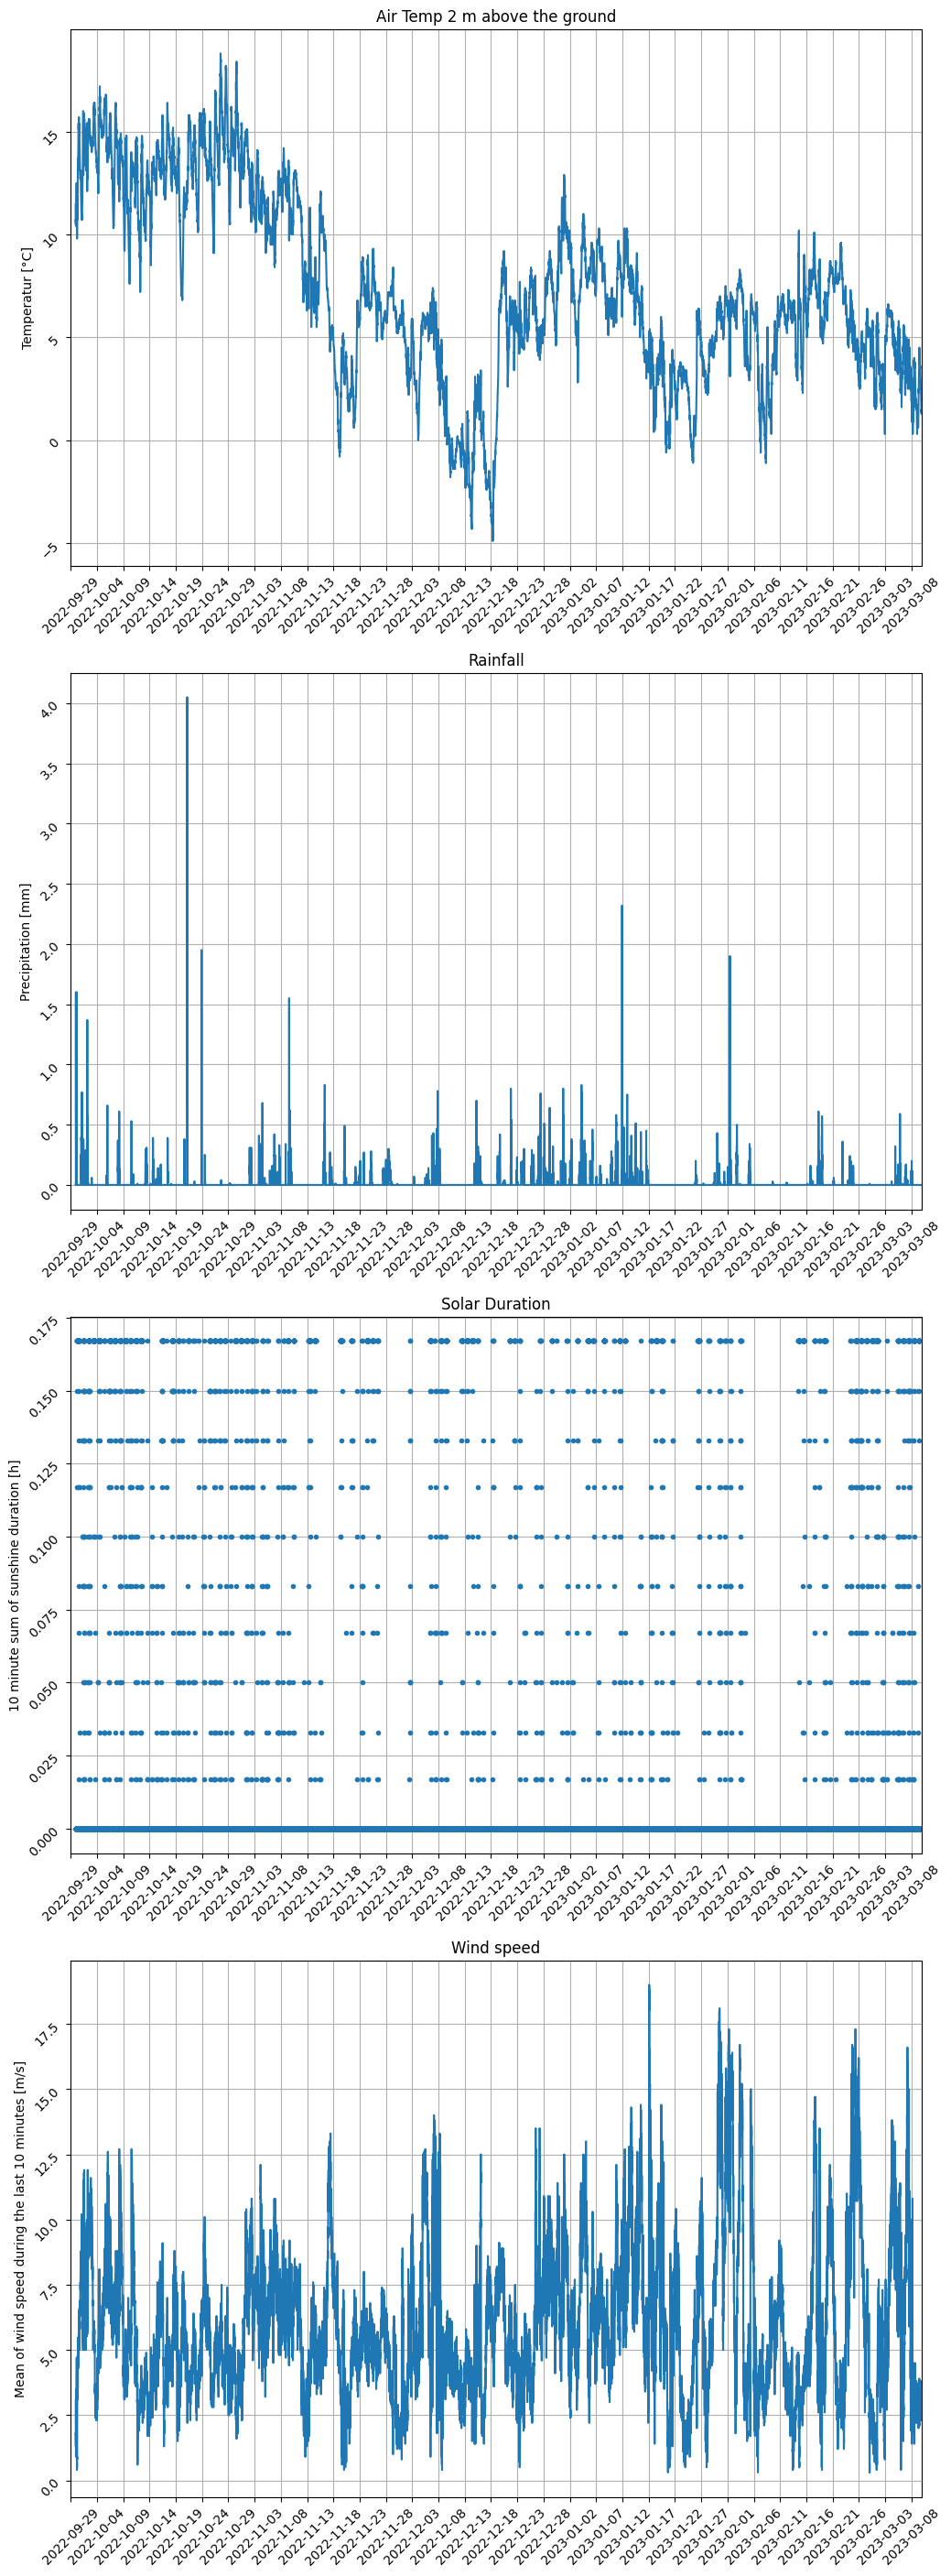

In [11]:
start_date = datetime.datetime(2022,9,30,  tzinfo = pytz.timezone("Europe/Berlin")) 
end_date   = datetime.datetime(2023,3,10,  tzinfo = pytz.timezone("Europe/Berlin"))

days = np.arange(np.datetime64(np.datetime_as_string(np.datetime64(start_date))[:10]),
         np.datetime64(np.datetime_as_string(np.datetime64(end_date))[:10]), 5)

data_merged_dated = data_merged_filtered[(data_merged_filtered['MESS_DATUM'] >= start_date)
                                         & (data_merged_filtered['MESS_DATUM'] <= end_date)]

fig, axes = plt.subplots(4, figsize=(12,35))

ax = axes[0]
ax.plot(data_merged_dated['MESS_DATUM'], data_merged_dated['TT_10'])

ax.grid()
ax.set_title('Air Temp 2 m above the ground')
ax.set_ylabel("Temperatur [°C]")
ax.set_xlim(start_date, end_date)
ax.set_xticks(days)
ax.tick_params(labelrotation=45)

ax = axes[1]
ax.plot(data_merged_dated['MESS_DATUM'], data_merged_dated['RWS_10'])

ax.grid()
ax.set_title('Rainfall')
ax.set_ylabel("Precipitation [mm]")
ax.set_xlim(start_date, end_date)
ax.set_xticks(days)
ax.tick_params(labelrotation=45)

ax = axes[2]
ax.plot(data_merged_dated['MESS_DATUM'], data_merged_dated['SD_10'], ".")

ax.grid()
ax.set_title('Solar Duration')
ax.set_ylabel("10 minute sum of sunshine duration [h]")
ax.set_xlim(start_date, end_date)
ax.set_xticks(days)
ax.tick_params(labelrotation=45)

ax = axes[3]
ax.plot(data_merged_dated['MESS_DATUM'], data_merged_dated['FF_10'])

ax.grid()
ax.set_title('Wind speed')
ax.set_ylabel("Mean of wind speed during the last 10 minutes [m/s]")
ax.set_xlim(start_date, end_date)
ax.set_xticks(days)
ax.tick_params(labelrotation=45)

data_merged.to_pickle('../../../Data/2022_10_28_norderney_weather_dwd/merged_data.pkl')

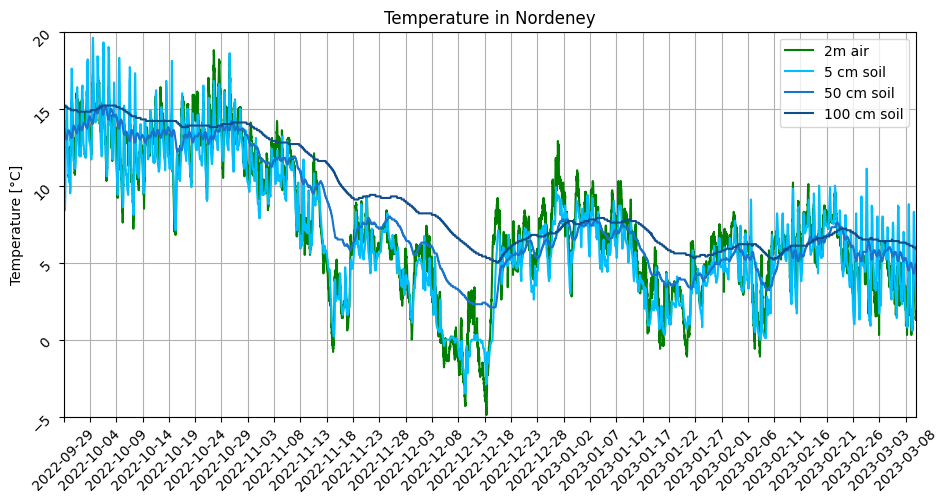

In [12]:
fig, axes = plt.subplots(1, figsize=(11,5))

ax = axes

ax.plot(data_merged_dated['MESS_DATUM'], data_merged_dated['TT_10'], color="green", label="2m air")

ax.plot(soil["MESS_DATUM"], soil["V_TE005"], color="#00BFFF", label="5 cm soil")
ax.plot(soil["MESS_DATUM"], soil["V_TE050"], color="#1874CD", label="50 cm soil")
ax.plot(soil["MESS_DATUM"], soil["V_TE100"], color="#104E8B", label="100 cm soil")

ax.set_ylim(-5,20)
ax.grid()
ax.set_title('Temperature in Nordeney')
ax.set_ylabel("Temperature [°C]")
ax.set_xlim(start_date, end_date)
ax.set_xticks(days)
ax.tick_params(labelrotation=45)
ax.legend()

fig.savefig("Output/soil_temp.pdf", dpi=300)

In [ ]:
fig, axes = plt.subplots(1, figsize=(11,5))

ax = axes
ax.plot(data_merged_dated['MESS_DATUM'], data_merged_dated['T'])

ax.grid()
ax.set_title('Atm Pressure')
ax.set_ylabel("Pressure [hPa]")
ax.set_xlim(start_date, end_date)
ax.set_xticks(days)
ax.tick_params(labelrotation=45)

In [36]:
df_60s = pd.read_pickle('../../../Data/2023_03_09_spiekeroog/Geolore/Total_data_untill_20230309.pkl')

In [40]:
df_60s

2         3         4   0   1
2022-08-10 13:35:00+02:00 -0.007819 -0.007581 -0.008041 NaN NaN
2022-08-10 13:36:00+02:00 -0.007322 -0.007037 -0.007449 NaN NaN
2022-08-10 13:37:00+02:00 -0.007353 -0.007107 -0.007527 NaN NaN
2022-08-10 13:38:00+02:00 -0.007083 -0.006859 -0.007237 NaN NaN
2022-08-10 13:39:00+02:00 -0.006744 -0.006577 -0.006804 NaN NaN
...                             ...       ...       ...  ..  ..
2023-03-09 12:13:00        0.022526 -0.039571 -0.000451 NaN NaN
2023-03-09 12:14:00        0.022334 -0.039766 -0.000444 NaN NaN
2023-03-09 12:15:00        0.022499 -0.039655 -0.000432 NaN NaN
2023-03-09 12:16:00        0.022456 -0.039672 -0.000459 NaN NaN
2023-03-09 12:17:00        0.022474 -0.039677 -0.000453 NaN NaN

[325371 rows x 5 columns]

C:\Users\Memo\AppData\Local\Temp\ipykernel_5476\2038679076.py:4: DeprecationWarning:

parsing timezone aware datetimes is deprecated; this will raise an error in the future

C:\Users\Memo\AppData\Local\Temp\ipykernel_5476\2038679076.py:5: DeprecationWarning:

parsing timezone aware datetimes is deprecated; this will raise an error in the future



ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2022-08-10 13:35:00+0200', tz='Europe/Berlin', freq='T'),
       Timestamp('2022-08-10 13:36:00+0200', tz='Europe/Berlin', freq='T'),
       Timestamp('2022-08-10 13:37:00+0200', tz='Europe/Berlin', freq='T'),
       ..., Timestamp('2023-03-09 12:15:00', freq='T'),
       Timestamp('2023-03-09 12:16:00', freq='T'),
       Timestamp('2023-03-09 12:17:00', freq='T')], dtype=object)

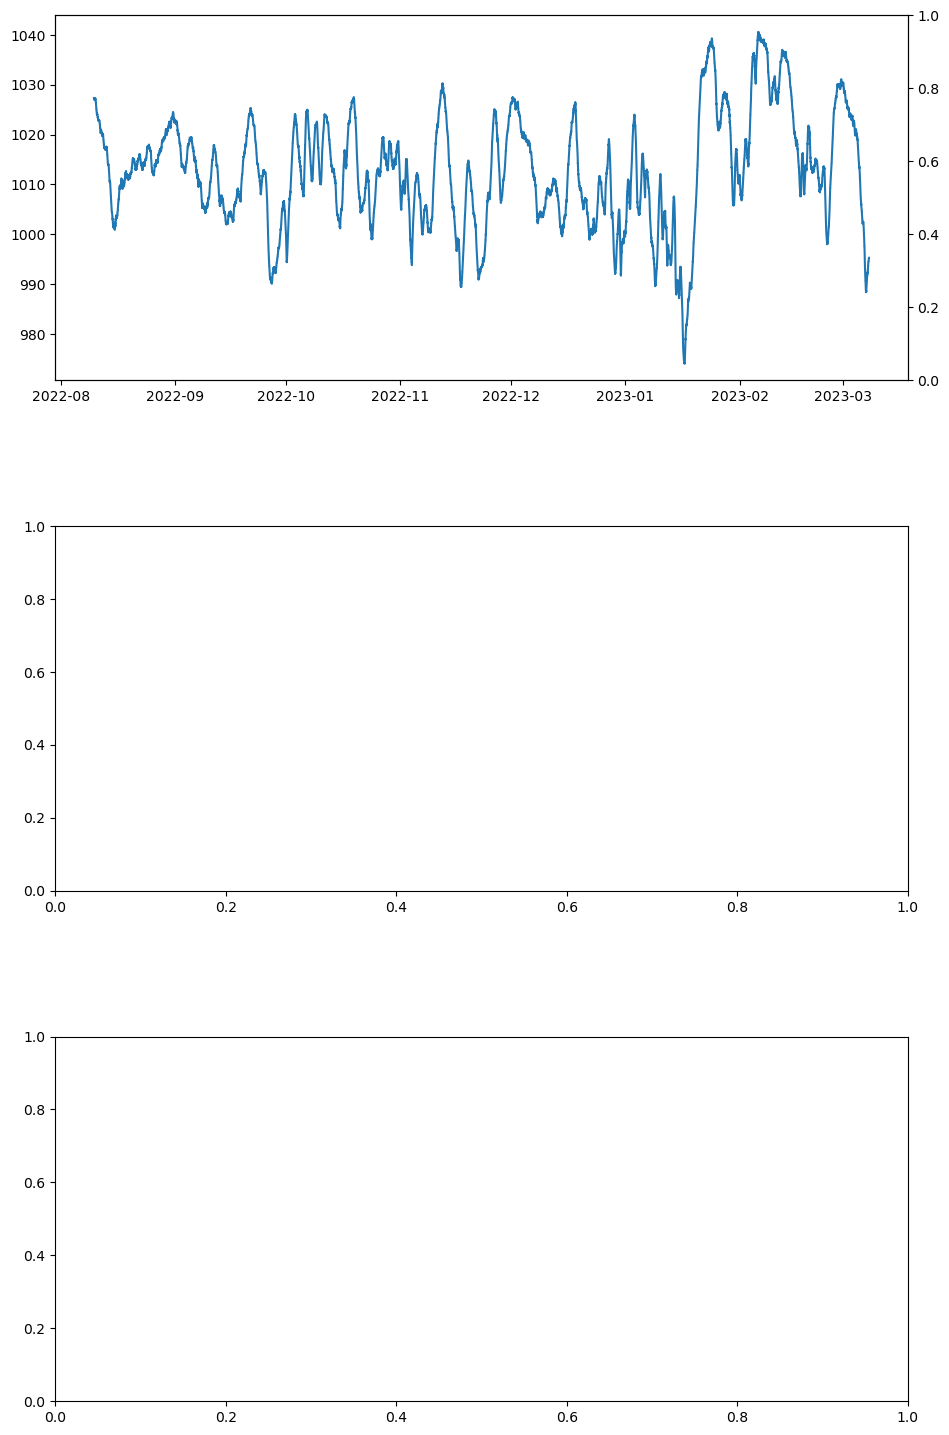

In [39]:
start_date = datetime.datetime(2022, 8, 10,  tzinfo = pytz.timezone("Europe/Berlin")) 
end_date   = datetime.datetime(2023, 3,  8,  tzinfo = pytz.timezone("Europe/Berlin")) 

days = np.arange(np.datetime64(np.datetime_as_string(np.datetime64(start_date))[:10]),
         np.datetime64(np.datetime_as_string(np.datetime64(end_date))[:10]), 10)

data_merged_dated = data_merged[(data_merged['MESS_DATUM'] >= start_date) & (data_merged['MESS_DATUM'] <= end_date)]

fig, axes = plt.subplots(3, figsize=(11,18))
plt.subplots_adjust(hspace= 0.4)

ax = axes[0]
ax.plot(data_merged_dated['MESS_DATUM'], data_merged_dated['PP_10'], label="Pressure")

ax1 = ax.twinx()
ax1.plot(df_60s.index, df_60s.iloc[:,2], color='orange', label="West Electrode")
ax1.set_ylim(-0.003, 0.011)
ax1.legend(loc="upper left")
ax1.set_ylabel("Voltage [V]")

ax.grid()
ax.set_title('Atmospheric Pressure')
ax.set_ylabel("Pressure [hPa]")
ax.set_xlim(start_date, end_date)
ax.set_xticks(days)
ax.tick_params(labelrotation=45)
ax.legend()


ax = axes[1]
ax.plot(data_merged_dated['MESS_DATUM'], data_merged_dated['TT_10'],label="Temperature")

ax1 = ax.twinx()
ax1.plot(df_60s.index, df_60s.iloc[:,2], color='orange', label="West Electrode")
ax1.set_ylim(-0.003, 0.011)
ax1.legend(loc="upper left")
ax1.set_ylabel("Voltage [V]")

ax.grid()
ax.set_title('Air Temp 2 m above the ground')
ax.set_ylabel("Temperatur [°C]")
ax.set_xlim(start_date, end_date)
ax.set_xticks(days)
ax.tick_params(labelrotation=45)
ax.legend()


ax = axes[2]
ax.plot(data_merged_dated['MESS_DATUM'], data_merged_dated['RWS_10'],label="Rainfall")

ax1 = ax.twinx()
ax1.plot(df_60s.index, df_60s.iloc[:,2], color='orange', label="West Electrode")
ax1.set_ylim(-0.003, 0.011)
ax1.legend(loc="upper left")
ax1.set_ylabel("Voltage [V]")


ax.grid()
ax.set_title('Rainfall')
ax.set_ylabel("Precipitation [mm]")
ax.set_xlim(start_date, end_date)
ax.set_xticks(days)
ax.tick_params(labelrotation=45)
ax.legend()

#fig.savefig("Output/Weather_Westelectrode.pdf")

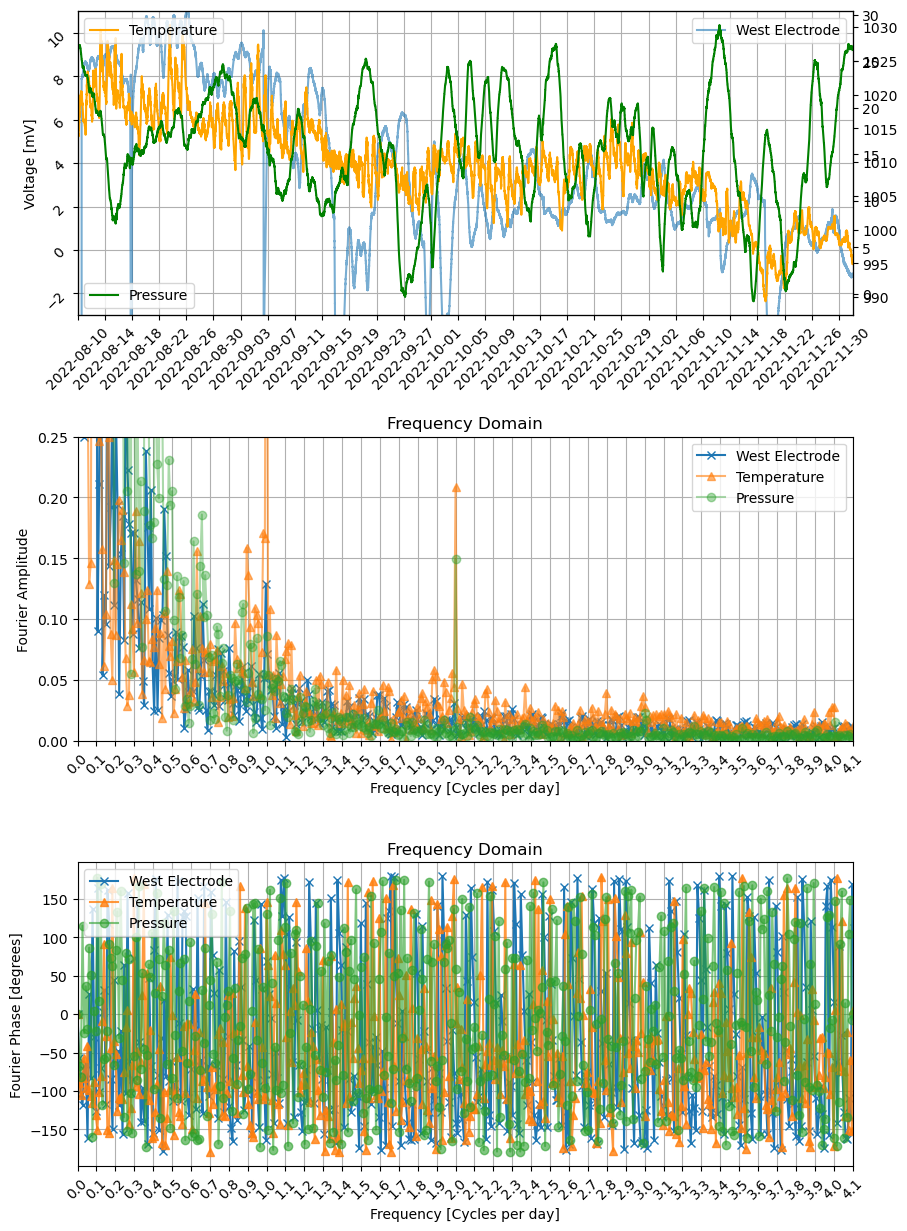

In [49]:
#start_date = datetime.datetime(2022,8,10,15)
#end_date = datetime.datetime(2022,8,21)

#start_date = datetime.datetime(2022,8,18,15,1,30)
#end_date = datetime.datetime(2022,9,5,23,30)

start_date = datetime.datetime(2022,8,10)
end_date = datetime.datetime(2022,12,2)

days = np.arange(np.datetime64(np.datetime_as_string(np.datetime64(start_date))[:10]),
         np.datetime64(np.datetime_as_string(np.datetime64(end_date+datetime.timedelta(days=1)))[:10]), 4)



geolore_data_dated = df_60s[(df_60s.index>=start_date) &  (df_60s.index<=end_date)]
data_merged_dated = data_merged[(data_merged['MESS_DATUM'] >= start_date) & (data_merged['MESS_DATUM'] <= end_date)]


si = 60

X = geolore_data_dated.iloc[:,2].values*10**3
N = len(X)
F_geolore = np.fft.fft(X)/N
F_freq_geolore = np.fft.fftfreq(N, d=si )

one_side_geolore = N//2

X = data_merged_dated["PP_10"].values
N = len(X)
F_pres = np.fft.fft(X)/N

X = data_merged_dated["TT_10"].values
F_temp = np.fft.fft(X)/N

F_freq_weather = np.fft.fftfreq(N, d=60*10 ) # sampling rate 10 min

one_side_weather = N//2

fig , axes = plt.subplots(3, figsize=(10,15))
plt.subplots_adjust(hspace= 0.4)

ax = axes[0]
ax.plot(geolore_data_dated.index, geolore_data_dated.iloc[:,2]*10**3, alpha=0.6, label="West Electrode")
ax.set_ylim(-3,11)
ax.set_ylabel("Voltage [mV]")

ax1 = ax.twinx()
ax1.plot(data_merged_dated['MESS_DATUM'], data_merged_dated['TT_10'], color="orange", label="Temperature")
ax1.legend(loc="upper left")

ax2 = ax.twinx()
ax2.plot(data_merged_dated['MESS_DATUM'], data_merged_dated['PP_10'], color="green", label="Pressure")
ax2.legend(loc="lower left")
#ax.set_title('Atmospheric Pressure')
#ax.set_ylabel("Pressure [hPa]")

#ax.set_title('Air Temp 2 m above the ground')
#ax.set_ylabel("Temperatur [°C]")



ax.grid()

ax.set_xlim(start_date, end_date)
ax.set_xticks(days)
ax.tick_params(labelrotation=45)
ax.legend()




ax = axes[1]

ax.plot(F_freq_geolore[:one_side_geolore], np.abs(F_geolore[:one_side_geolore])
        , 'x-' , label='West Electrode')

ax.plot(F_freq_weather[:one_side_weather], np.abs(F_temp[:one_side_weather])
        , '^-' , alpha=0.6, label='Temperature')

ax.plot(F_freq_weather[:one_side_weather], np.abs(F_pres[:one_side_weather])
        , 'o-' , alpha=0.4, label='Pressure')


x_freq_cpd = np.arange(0,4.2,0.1)
x_freq_hz = x_freq_cpd/(24*60*60)
ax.set_xlim(x_freq_hz[0], x_freq_hz[-1])
ax.set_xticks(x_freq_hz, labels= np.round(x_freq_cpd,1))
ax.tick_params('x',rotation=45)
ax.set_ylim(0 , 0.25)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Amplitude")
ax.legend()    
ax.grid()

ax = axes[2]

ax.plot(F_freq_geolore[:one_side_geolore], np.angle(F_geolore[:one_side_geolore])*180/np.pi, "x-", label='West Electrode')
ax.plot(F_freq_weather[:one_side_weather], np.angle(F_temp[:one_side_weather])*180/np.pi,
        "^-", alpha = 0.8,  label='Temperature')
ax.plot(F_freq_weather[:one_side_weather], np.angle(F_pres[:one_side_weather])*180/np.pi,
        "o-", alpha=0.6, label='Pressure')




x_freq_cpd = np.arange(0,4.2,0.1)
x_freq_hz = x_freq_cpd/(24*60*60)
ax.set_xlim(x_freq_hz[0], x_freq_hz[-1])
ax.set_xticks(x_freq_hz, labels= np.round(x_freq_cpd,1))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Phase [degrees]")
ax.legend()    
ax.grid()



#fig.savefig("Output/West_Temp_Pres_FFT.pdf")

In [51]:
data1 = pd.read_csv("../../../Data/2022_08_09_Tides_Grav/2022_0809_0908_grav.csv", parse_dates=[0])
data2 = pd.read_csv("../../../Data/2022_08_09_Tides_Grav/2022_0908_1008_grav.csv", parse_dates=[0])
data3 = pd.read_csv("../../../Data/2022_08_09_Tides_Grav/2022_1007_1106_grav.csv", skiprows=2 ,parse_dates=[0])
data4 = pd.read_csv("../../../Data/2022_08_09_Tides_Grav/2022_1105_1205_grav.csv", skiprows=2 ,parse_dates=[0])

tides = pd.concat([data1, data2,data3, data4])
tides.rename(columns={'Datetime[UTC+0.0h]':'Datetime', 
                      'Signal [nm/s**2]': 'Signal', 
                      'Tide [nm/s**2]': 'Tide', 
                      'Pole tide [nm/s**2]' : 'Pole_tide', 
                      'LOD tide [nm/s**2]'  : 'LOD_tide'
                     }, inplace=True)
tides.drop_duplicates('Datetime', inplace=True)
tides

Datetime      Signal        Tide  Pole_tide  LOD_tide
0     2022-08-09 00:00:00  861.462922  818.384908  43.421935 -0.343921
1     2022-08-09 00:01:00  861.306205  818.228048  43.422079 -0.343922
2     2022-08-09 00:02:00  861.141826  818.063526  43.422222 -0.343922
3     2022-08-09 00:03:00  860.969657  817.891214  43.422366 -0.343923
4     2022-08-09 00:04:00  860.789571  817.710985  43.422509 -0.343923
...                   ...         ...         ...        ...       ...
43196 2022-12-04 23:56:00 -280.336783 -299.690992  19.316021  0.038188
43197 2022-12-04 23:57:00 -276.557327 -295.911155  19.315687  0.038141
43198 2022-12-04 23:58:00 -272.761100 -292.114548  19.315354  0.038095
43199 2022-12-04 23:59:00 -268.948317 -288.301385  19.315020  0.038048
43200 2022-12-05 00:00:00 -265.119207 -284.471895  19.314686  0.038001

[169921 rows x 5 columns]

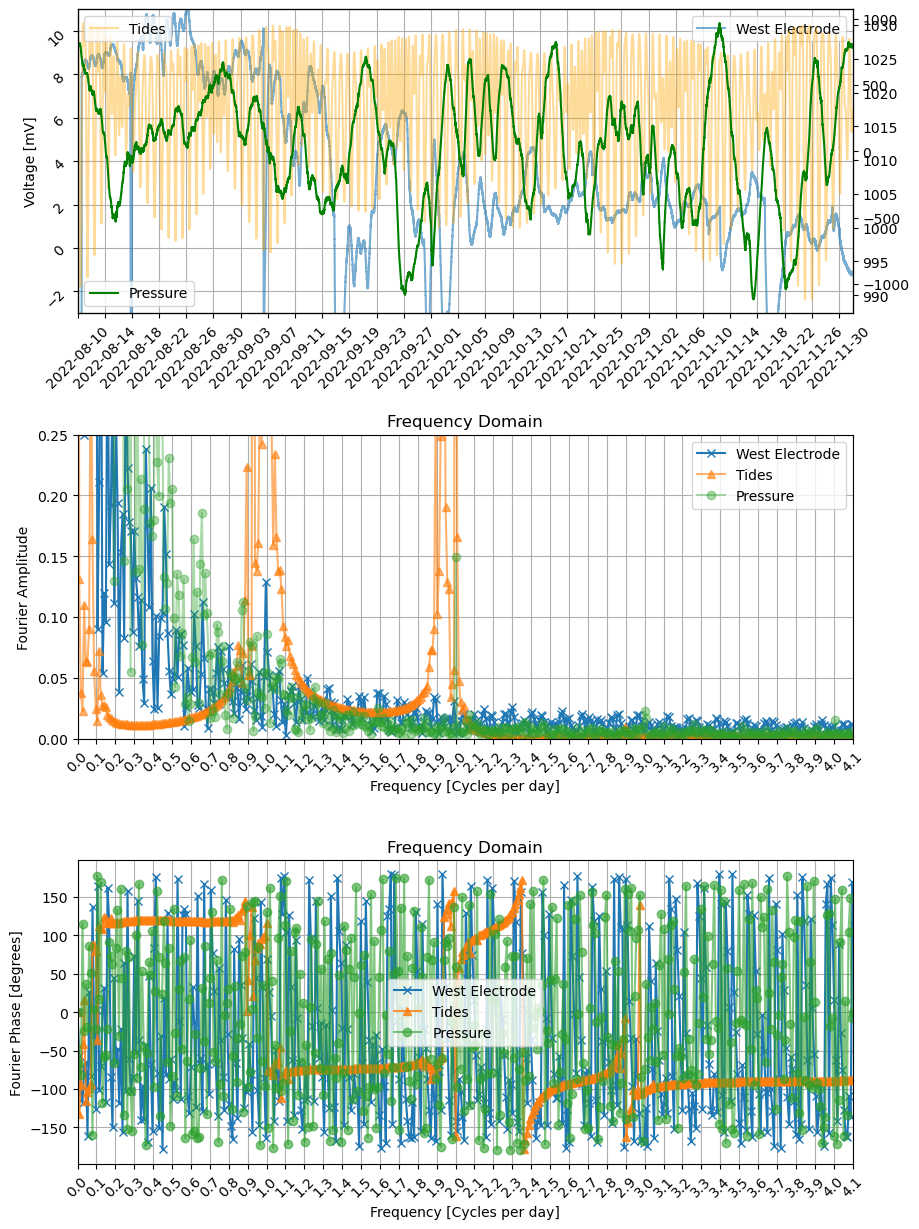

In [58]:
#start_date = datetime.datetime(2022,8,10,15)
#end_date = datetime.datetime(2022,8,21)

#start_date = datetime.datetime(2022,8,18,15,1,30)
#end_date = datetime.datetime(2022,9,5,23,30)

start_date = datetime.datetime(2022,8,10)
end_date = datetime.datetime(2022,12,2)

days = np.arange(np.datetime64(np.datetime_as_string(np.datetime64(start_date))[:10]),
         np.datetime64(np.datetime_as_string(np.datetime64(end_date+datetime.timedelta(days=1)))[:10]), 4)



geolore_data_dated = df_60s[(df_60s.index>=start_date) &  (df_60s.index<=end_date)]
data_merged_dated = data_merged[(data_merged['MESS_DATUM'] >= start_date) & (data_merged['MESS_DATUM'] <= end_date)]
tides_dated = tides[(tides['Datetime'] >= start_date) & (tides['Datetime'] <= end_date)]



X = geolore_data_dated.iloc[:,2].values*10**3
N = len(X)
F_geolore = np.fft.fft(X)/N
F_freq_geolore = np.fft.fftfreq(N, d=60 )
one_side_geolore = N//2

X = data_merged_dated["PP_10"].values
N = len(X)
F_pres = np.fft.fft(X)/N
F_freq_weather = np.fft.fftfreq(N, d=60*10 ) # sampling rate 10 min
one_side_weather = N//2

X = tides_dated['Signal'].values
N = len(X)
F_tides = np.fft.fft(X)/N
F_freq_tides = np.fft.fftfreq(N, d=60 ) # sampling rate 1 min
one_side_tides = N//2


fig , axes = plt.subplots(3, figsize=(10,15))
plt.subplots_adjust(hspace= 0.4)

ax = axes[0]
ax.plot(geolore_data_dated.index, geolore_data_dated.iloc[:,2]*10**3, alpha=0.6, label="West Electrode")
ax.set_ylim(-3,11)
ax.set_ylabel("Voltage [mV]")

ax1 = ax.twinx()
ax1.plot(tides['Datetime'], tides['Signal'], alpha = 0.4, color='orange', label="Tides")
ax1.legend(loc="upper left")

ax2 = ax.twinx()
ax2.plot(data_merged_dated['MESS_DATUM'], data_merged_dated['PP_10'], color="green", label="Pressure")
ax2.legend(loc="lower left")
#ax.set_title('Atmospheric Pressure')
#ax.set_ylabel("Pressure [hPa]")

#ax.set_title('Air Temp 2 m above the ground')
#ax.set_ylabel("Temperatur [°C]")



ax.grid()

ax.set_xlim(start_date, end_date)
ax.set_xticks(days)
ax.tick_params(labelrotation=45)
ax.legend()




ax = axes[1]

ax.plot(F_freq_geolore[:one_side_geolore], np.abs(F_geolore[:one_side_geolore])
        , 'x-' , label='West Electrode')

ax.plot(F_freq_tides[:one_side_tides], np.abs(F_tides[:one_side_tides])/100
        , '^-' , alpha=0.6, label='Tides')

ax.plot(F_freq_weather[:one_side_weather], np.abs(F_pres[:one_side_weather])
        , 'o-' , alpha=0.4, label='Pressure')


x_freq_cpd = np.arange(0,4.2,0.1)
x_freq_hz = x_freq_cpd/(24*60*60)
ax.set_xlim(x_freq_hz[0], x_freq_hz[-1])
ax.set_xticks(x_freq_hz, labels= np.round(x_freq_cpd,1))
ax.tick_params('x',rotation=45)
ax.set_ylim(0 , 0.25)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Amplitude")
ax.legend()    
ax.grid()

ax = axes[2]

ax.plot(F_freq_geolore[:one_side_geolore], np.angle(F_geolore[:one_side_geolore])*180/np.pi, "x-", label='West Electrode')
ax.plot(F_freq_tides[:one_side_tides], np.angle(F_tides[:one_side_tides])*180/np.pi,
        "^-", alpha = 0.8,  label='Tides')
ax.plot(F_freq_weather[:one_side_weather], np.angle(F_pres[:one_side_weather])*180/np.pi,
        "o-", alpha=0.6, label='Pressure')




x_freq_cpd = np.arange(0,4.2,0.1)
x_freq_hz = x_freq_cpd/(24*60*60)
ax.set_xlim(x_freq_hz[0], x_freq_hz[-1])
ax.set_xticks(x_freq_hz, labels= np.round(x_freq_cpd,1))
ax.tick_params('x',rotation=45)
ax.set_xlabel("Frequency [Cycles per day]")
ax.set_title('Frequency Domain')
ax.set_ylabel("Fourier Phase [degrees]")
ax.legend()    
ax.grid()



#fig.savefig("Output/West_Temp_Pres_FFT.pdf")